Loading dataset from: /content/nsl_kdd_dataset.csv
✔ Dataset Loaded Successfully!  Shape: (4430, 42)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0.666287,0.577740,0.248644,0.039280,0.151331,0.441503,0.996257,0.739421,0.042406,0.244036,...,0.223672,0.336817,0.546493,0.529456,0.591125,0.470904,0.539593,0.518795,0.616669,U2R
1,0.143014,0.729235,0.539983,0.485997,0.055436,0.291892,0.143944,0.858332,0.304242,0.901082,...,0.610218,0.755973,0.713821,0.688312,0.311610,0.246923,0.600187,0.153257,0.676371,normal
2,0.401813,0.101389,0.961499,0.367041,0.133935,0.567280,0.080431,0.875795,0.603445,0.235740,...,0.077247,0.519867,0.716784,0.535350,0.711465,0.861131,0.122357,0.578372,0.511315,DoS
3,0.887278,0.168009,0.660708,0.656651,0.614879,0.400250,0.853977,0.907267,0.469452,0.998242,...,0.054651,0.465111,0.425285,0.847906,0.124342,0.096678,0.026864,0.574663,0.226657,U2R
4,0.360109,0.274258,0.064115,0.353499,0.531030,0.539846,0.001381,0.897988,0.350272,0.597418,...,0.118315,0.551459,0.166497,0.943283,0.372073,0.051407,0.983987,0.456051,0.746222,DoS



Columns: ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label']

Value counts (label_binary):
label_binary
1    3544
0     886
Name: count, dtype: int64

Numeric columns: 41
Categorical columns: 0

Train shape: (3544, 41) Test shape: (886, 41)

Training RandomForest...
✔ Model training completed.

============= MOD

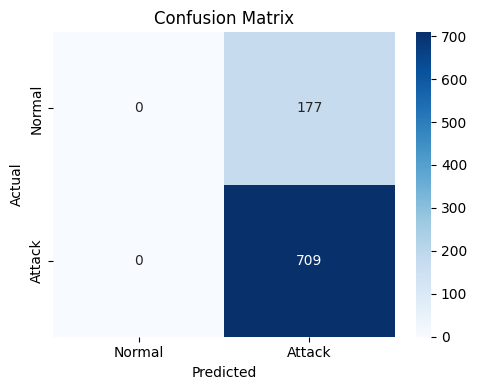

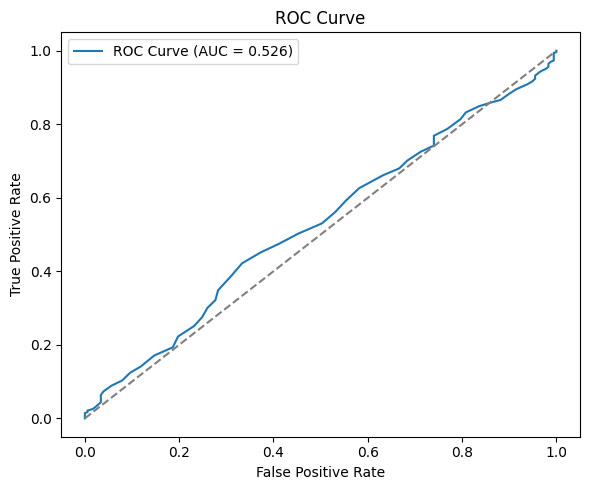

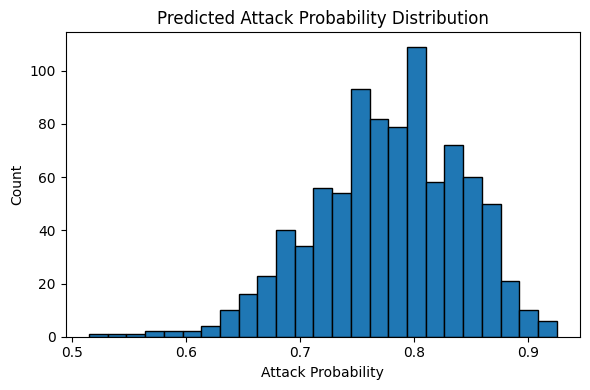

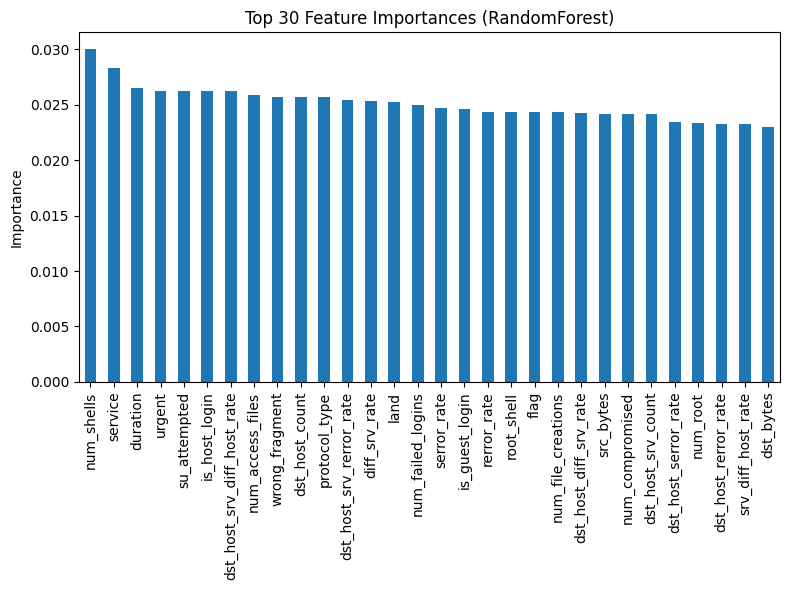


Saved trained model pipeline to: nslkdd_rf_model.joblib
Saved feature names to nslkdd_feature_names.csv

Sample input (preview):


,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,100
dst_bytes,100
land,0
wrong_fragment,0
urgent,0
hot,0


=== SAMPLE PREDICTION ===
Predicted label : 0 (Normal)
Predicted prob  : 0.4


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, auc
)
DATA_PATH = "/content/nsl_kdd_dataset.csv"
MODEL_OUTPUT = "nslkdd_rf_model.joblib"
print("Loading dataset from:", DATA_PATH)
df = pd.read_csv(DATA_PATH)
print("✔ Dataset Loaded Successfully!  Shape:", df.shape)
display(df.head())
print("\nColumns:", list(df.columns))
if 'label' not in df.columns:
    raise ValueError("Dataset must contain a 'label' column. Check your CSV headers.")

df['label_binary'] = df['label'].apply(lambda x: 0 if str(x).strip().lower() == 'normal' else 1)
print("\nValue counts (label_binary):")
print(df['label_binary'].value_counts())
X = df.drop(columns=['label', 'label_binary'])
y = df['label_binary']
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
print("\nNumeric columns:", len(numeric_cols))
print("Categorical columns:", len(categorical_cols))
preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols)
    ],
    remainder='drop'
)
clf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
model_pipeline = Pipeline(steps=[
    ("preprocess", preprocess),
    ("classifier", clf)
])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)
print("\nTrain shape:", X_train.shape, "Test shape:", X_test.shape)
print("\nTraining RandomForest...")
model_pipeline.fit(X_train, y_train)
print("✔ Model training completed.")
y_pred = model_pipeline.predict(X_test)
try:
    y_prob = model_pipeline.predict_proba(X_test)[:, 1]
except Exception:
    y_prob = np.zeros_like(y_pred, dtype=float)

print("\n============= MODEL PERFORMANCE =============")
print("Accuracy  :", accuracy_score(y_test, y_pred))
print("Precision :", precision_score(y_test, y_pred, zero_division=0))
print("Recall    :", recall_score(y_test, y_pred, zero_division=0))
if y_prob is not None and len(np.unique(y_test)) > 1:
    print("ROC-AUC   :", roc_auc_score(y_test, y_prob))
print("==============================================\n")

print("Classification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Normal", "Attack"],
            yticklabels=["Normal", "Attack"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
if y_prob is not None and len(np.unique(y_test)) > 1:
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})")
    plt.plot([0,1], [0,1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.tight_layout()
    plt.show()
plt.figure(figsize=(6,4))
plt.hist(y_prob, bins=25, edgecolor="black")
plt.title("Predicted Attack Probability Distribution")
plt.xlabel("Attack Probability")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
feature_names = []
feature_names.extend(numeric_cols)
if len(categorical_cols) > 0:
    ohe = model_pipeline.named_steps['preprocess'].named_transformers_.get('cat', None)
    if ohe is not None:
        try:
            ohe_feature_names = ohe.get_feature_names_out(categorical_cols).tolist()
        except Exception:

            ohe_feature_names = []
            for col in categorical_cols:
                cats = ohe.categories_[categorical_cols.index(col)]
                for c in cats:
                    ohe_feature_names.append(f"{col}_{c}")
        feature_names.extend(ohe_feature_names)
try:
    importances = model_pipeline.named_steps['classifier'].feature_importances_
    if len(importances) == len(feature_names):
        fi = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(30)
        plt.figure(figsize=(8,6))
        fi.plot(kind='bar')
        plt.title("Top 30 Feature Importances (RandomForest)")
        plt.ylabel("Importance")
        plt.tight_layout()
        plt.show()
    else:
        print("Warning: feature importance length mismatch. Skipping feature importance plot.")
except Exception as e:
    print("Could not compute feature importances:", e)
joblib.dump(model_pipeline, MODEL_OUTPUT)
print(f"\nSaved trained model pipeline to: {MODEL_OUTPUT}")
try:
    pd.Series(feature_names).to_csv("nslkdd_feature_names.csv", index=False)
    print("Saved feature names to nslkdd_feature_names.csv")
except Exception:
    pass
sample = {}
for c in numeric_cols:
    if 'duration' in c:
        sample[c] = 0
    elif 'bytes' in c or 'size' in c:
        sample[c] = 100
    else:
        sample[c] = 0
for c in categorical_cols:
    if c.lower() in ('protocol_type','protocol'):
        sample[c] = 'tcp'
    elif c.lower() == 'service':
        sample[c] = 'http'
    elif c.lower() == 'flag':
        sample[c] = 'SF'
    else:
        try:
            sample[c] = X[c].dropna().unique()[0]
        except Exception:
            sample[c] = ''
sample_df = pd.DataFrame([sample])[X.columns]
print("\nSample input (preview):")
display(sample_df.head().T)
try:
    sample_pred = model_pipeline.predict(sample_df)[0]
    sample_prob = model_pipeline.predict_proba(sample_df)[0][1]
    label_str = "Attack" if sample_pred == 1 else "Normal"
    print("=== SAMPLE PREDICTION ===")
    print("Predicted label :", sample_pred, f"({label_str})")
    print("Predicted prob  :", round(sample_prob, 4))
except Exception as e:
    print("Sample prediction failed:", e)

